<a href="https://colab.research.google.com/github/jzambrano-xyz/cyberdigest.xyz/blob/main/Simple_Neural_Network_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network with **Pytorch**
From Aymeric Damien via [GitHub](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/3_NeuralNetworks/neural_network.ipynb)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

In [ ]:
# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [ ]:
# Prepare MNIST data.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 79760179.19it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 73017295.86it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 64217386.11it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 14465093.98it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Create PyTorch Model.
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.out = nn.Linear(n_hidden_2, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        return self.out(x)

In [ ]:
# Build neural network model.
neural_net = NeuralNet()

# Loss and optimizer.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(neural_net.parameters(), lr=learning_rate)

In [ ]:
# Training loop with early stopping condition.
for epoch in range(training_steps):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass.
        outputs = neural_net(images.view(-1, 28*28))
        loss = criterion(outputs, labels)

        # Backward and optimize.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if loss.item() < 0.0015:
            print(f'Early stopping triggered at Epoch [{epoch + 1}/{training_steps}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item()}')
            break  # Break out of the inner loop

        if (i + 1) % display_step == 0:
            print(f'Epoch [{epoch + 1}/{training_steps}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item()}')

    if loss.item() < 0.0015:
        break  # Break out of the outer loop to stop training


Epoch [1/2000], Step [100/235], Loss: 0.5011743903160095
Epoch [1/2000], Step [200/235], Loss: 0.3470001816749573
Epoch [2/2000], Step [100/235], Loss: 0.3941922187805176
Epoch [2/2000], Step [200/235], Loss: 0.2926996350288391
Epoch [3/2000], Step [100/235], Loss: 0.301177442073822
Epoch [3/2000], Step [200/235], Loss: 0.15881939232349396
Epoch [4/2000], Step [100/235], Loss: 0.14641879498958588
Epoch [4/2000], Step [200/235], Loss: 0.21809698641300201
Epoch [5/2000], Step [100/235], Loss: 0.12886320054531097
Epoch [5/2000], Step [200/235], Loss: 0.15606963634490967
Epoch [6/2000], Step [100/235], Loss: 0.11827632039785385
Epoch [6/2000], Step [200/235], Loss: 0.13526831567287445
Epoch [7/2000], Step [100/235], Loss: 0.14671218395233154
Epoch [7/2000], Step [200/235], Loss: 0.1632440984249115
Epoch [8/2000], Step [100/235], Loss: 0.13244830071926117
Epoch [8/2000], Step [200/235], Loss: 0.08610974252223969
Epoch [9/2000], Step [100/235], Loss: 0.09862031787633896
Epoch [9/2000], Step 

In [ ]:
# Testing the Model
def test_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images.view(-1, 28*28))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test images: {accuracy}%')

test_model(neural_net, test_loader)

Accuracy of the model on the test images: 97.48%


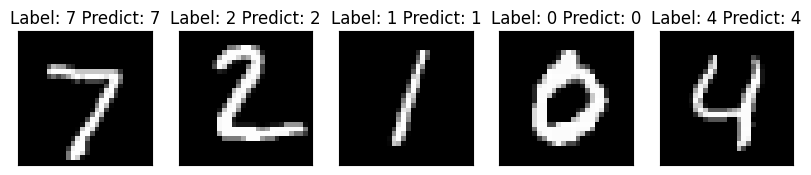

In [ ]:
# Visualize predictions.
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, test_loader, num_images=5):
    model.eval()
    images, labels = next(iter(test_loader))
    outputs = model(images.view(-1, 28*28))
    _, predicted = torch.max(outputs, 1)
    images = images.numpy()

    fig = plt.figure(figsize=(10, 4))
    for idx in range(num_images):
        ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(images[idx]), cmap='gray')
        ax.set_title(f"Label: {labels[idx]} Predict: {predicted[idx]}")
    plt.show()

visualize_predictions(neural_net, test_loader)

In [ ]:
# Displaying Specific Images and Predictions
def display_prediction(model, image, label):
    model.eval()
    output = model(image.view(-1, 28*28))
    _, predicted = torch.max(output, 1)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f"Label: {label} Predict: {predicted.item()}")
    plt.show()

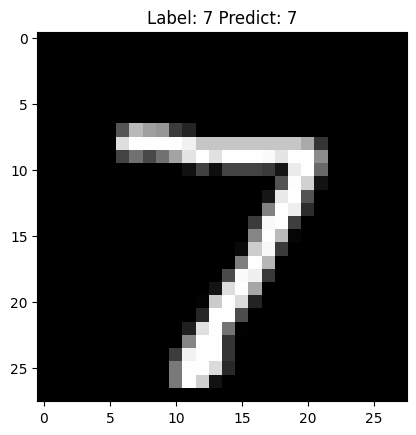

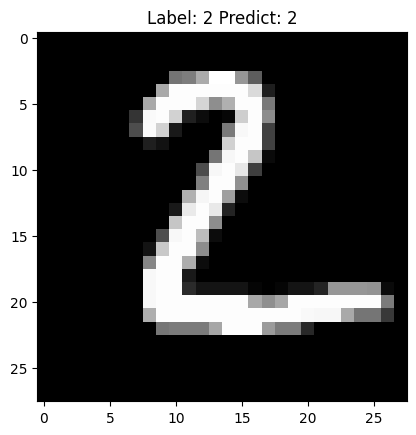

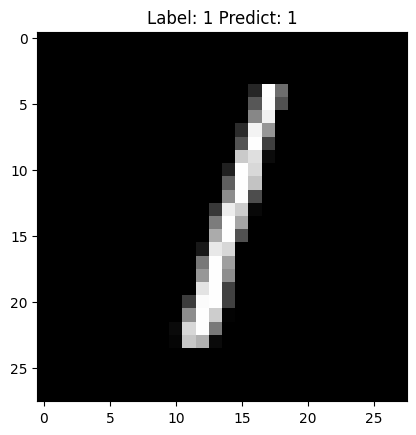

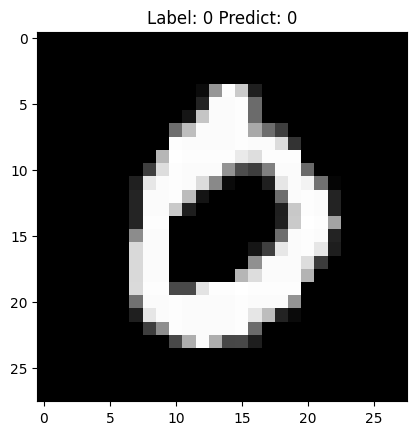

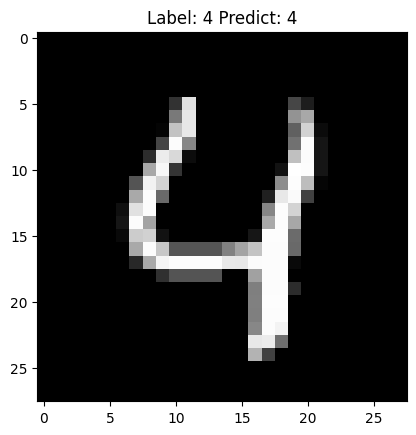

In [ ]:
# Displaying first 5 images from the test set
for i in range(5):
    display_prediction(neural_net, test_dataset[i][0], test_dataset[i][1])